In [1]:
%load_ext autoreload
%autoreload 2
import os, sys, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [2]:
def plot_data(data, x, y, outdir, tag, title, timing=None, smooth=1):
    if smooth > 1:
        """
        smooth data with moving window average.
        that is,
            smoothed_y[t] = average(y[t-k], y[t-k+1], ..., y[t+k-1], y[t+k])
        where the "smooth" param is width of that window (2k+1)
        """
        y = np.ones(smooth)
        for datum in data:
            x = np.asarray(datum[y])
            z = np.ones(len(x))
            smoothed_x = np.convolve(x,y,'same') / np.convolve(z,y,'same')
            datum[y] = smoothed_x
            
    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)
        if timing:
            data = data[data.timing == timing].drop('timing', axis=1)

    if not os.path.isdir(outdir):
        os.mkdir(outdir)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    sns.set(style="whitegrid", font_scale=1.5)
    sns.set_palette('Set2') # or husl
    if 'timing' in data.columns:
        sns.lineplot(x=x, y=y, ax=ax, data=data, hue=tag, style='timing')
    else:
        sns.lineplot(x=x, y=y, ax=ax, data=data, hue=tag)
    ax.grid(True, alpha=0.8, linestyle=':')
    ax.legend(loc='best').set_draggable(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if timing:
        title = f'{title}-{timing}'
    outpath = f'{outdir}/{title}.png'
    ax.set_title(title)
    fig.savefig(outpath)
    fig.show()
    print(f'Plot Path: {outpath}')

def get_datasets(files, tag, condition=None):
    unit = 0
    datasets = []
    for f in files:
        assert f.endswith('log.txt')
        data = pd.read_csv(f, sep='\t')

        data.insert(len(data.columns), tag, condition)

        datasets.append(data)
        unit +=1

    return datasets

In [3]:
a = np.random.normal(size=(2, 2))
b = np.random.normal(size=(2, 2))
c = np.random.normal(size=(2, 2))
np.testing.assert_allclose(a@b@c, c@a@b)

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 4 / 4 (100%)
Max absolute difference: 1.64806828
Max relative difference: 3.51062932
 x: array([[-0.340345, -0.588002],
       [-0.336668, -0.920949]])
 y: array([[ 0.135561, -0.232452],
       [ 1.3114  , -1.396855]])

In [48]:
%%timeit
tf.nest.map_structure(lambda x: x.numpy() if isinstance(x, tf.Tensor) else x, l)

49.6 µs ± 3.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [61]:
a = tf.random.uniform((64,), 0, 15, dtype=tf.int32)
qs = tf.random.uniform((64, 15), 0, 10)

In [69]:
import gym
env = gym.make('BipedalWalker-v3')
env.action_space.shape

/Users/aptx4869/anaconda3/envs/drl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(4,)

In [68]:
class A:
    def __init__(self):
        self.name = 'a';
    def f(self):
        return self.name

class B:
    def __init__(self):
        self.name = 'b';
    def f(self):
        return self.name
class C(A, B):
    def __init__(self):
        super().__init__()
c = C()
c.f()

'a'

In [96]:
def flatten_dict(**kwargs):
    """ Flatten a dict of lists into a list of dicts
    For example
    f(lr=[1, 2], a=[10,3], b=dict(c=[2, 4], d=np.arange(3)))
    >>>
    [{'lr': 1, 'a': 10, 'b': {'c': 2, 'd': 0}},
    {'lr': 1, 'a': 10, 'b': {'c': 2, 'd': 1}},
    {'lr': 1, 'a': 10, 'b': {'c': 2, 'd': 2}},
    {'lr': 1, 'a': 10, 'b': {'c': 4, 'd': 0}},
    {'lr': 1, 'a': 10, 'b': {'c': 4, 'd': 1}},
    {'lr': 1, 'a': 10, 'b': {'c': 4, 'd': 2}},
    {'lr': 1, 'a': 3, 'b': {'c': 2, 'd': 0}},
    {'lr': 1, 'a': 3, 'b': {'c': 2, 'd': 1}},
    {'lr': 1, 'a': 3, 'b': {'c': 2, 'd': 2}},
    {'lr': 1, 'a': 3, 'b': {'c': 4, 'd': 0}},
    {'lr': 1, 'a': 3, 'b': {'c': 4, 'd': 1}},
    {'lr': 1, 'a': 3, 'b': {'c': 4, 'd': 2}},
    {'lr': 2, 'a': 10, 'b': {'c': 2, 'd': 0}},
    {'lr': 2, 'a': 10, 'b': {'c': 2, 'd': 1}},
    {'lr': 2, 'a': 10, 'b': {'c': 2, 'd': 2}},
    {'lr': 2, 'a': 10, 'b': {'c': 4, 'd': 0}},
    {'lr': 2, 'a': 10, 'b': {'c': 4, 'd': 1}},
    {'lr': 2, 'a': 10, 'b': {'c': 4, 'd': 2}},
    {'lr': 2, 'a': 3, 'b': {'c': 2, 'd': 0}},
    {'lr': 2, 'a': 3, 'b': {'c': 2, 'd': 1}},
    {'lr': 2, 'a': 3, 'b': {'c': 2, 'd': 2}},
    {'lr': 2, 'a': 3, 'b': {'c': 4, 'd': 0}},
    {'lr': 2, 'a': 3, 'b': {'c': 4, 'd': 1}},
    {'lr': 2, 'a': 3, 'b': {'c': 4, 'd': 2}}]
    """
    ks, vs = [], []
    for k, v in kwargs.items():
        print('here')
        ks.append(k)
        if isinstance(v, dict):
            print(0)
            vs.append(flatten_dict(**v))
        elif isinstance(v, (int, float)):
            print(1)
            vs.append([v])
        else:
            print(2)
            vs.append(v)
    print(vs)
    result = []
    for k, v in itertools.product([ks], itertools.product(*vs)):
        result.append(dict(zip(k, v)))

    return result
flatten_dict()

[]


[{}]

In [113]:
sample time, obs_mean obs_var = 70.83269476890564 27.5120951034217 103.80096989803444

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [119]:
class RunningMeanStd(object):
    # https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Parallel_algorithm
    def __init__(self, epsilon=1e-4, shape=(), comm=None, use_mpi=True):
        self.mean = np.zeros(shape, 'float64')
        self.use_mpi = use_mpi
        self.var = np.ones(shape, 'float64')
        self.count = epsilon

    def update(self, x):
        batch_mean, batch_std, batch_count = np.mean(x, axis=0), np.std(x, axis=0), x.shape[0]
        batch_var = np.square(batch_std)
        self.update_from_moments(batch_mean, batch_var, batch_count)

    def update_from_moments(self, batch_mean, batch_var, batch_count):
        delta = batch_mean - self.mean
        tot_count = self.count + batch_count

        new_mean = self.mean + delta * batch_count / tot_count
        m_a = self.var * (self.count)
        m_b = batch_var * (batch_count)
        M2 = m_a + m_b + np.square(delta) * self.count * batch_count / (self.count + batch_count)
        new_var = M2 / (self.count + batch_count)

        new_count = batch_count + self.count

        self.mean = new_mean
        self.var = new_var
        self.count = new_count

obs = np.random.randint(0, 256, (32*10, 128, 84, 84, 1))
rms = RunningMeanStd(shape=(84, 84, 1))
rms.update(obs.reshape(-1, 84, 84, 1))
print(rms.mean.mean(), rms.var.mean())

127.50065616957318 5460.969658266675


In [123]:
def moments(x, axis=None, mask=None):
    if x.dtype == np.uint8:
        x = x.astype(np.int32)
    if mask is None:
        x_mean = np.mean(x, axis=axis)
        x2_mean = np.mean(x**2, axis=axis)
    else:
        if axis is None:
            axis = tuple(range(x.ndim))
        elif mask is not None:
            axis = (axis,) if isinstance(axis, int) else tuple(axis)
        # expand mask to match the dimensionality of x
        while len(mask.shape) < len(x.shape):
            mask = np.expand_dims(mask, -1)
        # compute valid entries in x corresponding to True in mask
        n = np.sum(mask)
        for i in axis:
            if mask.shape[i] != 1:
                assert mask.shape[i] == x.shape[i], (
                    f'{i}th dimension of mask({mask.shape[i]}) does not match'
                    f'that of x({x.shape[i]})')
            else:
                n *= x.shape[i]
        # compute x_mean and x_std from entries in x corresponding to True in mask
        x_mask = x * mask
        x_mean = np.sum(x_mask, axis=axis) / n
        x2_mean = np.sum(x_mask**2, axis=axis) / n
    x_var = x2_mean - x_mean**2

    return x_mean, x_var

class RunningMeanStd:
    # https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Parallel_algorithm
    def __init__(self, axis, epsilon=1e-8, clip=None):
        """ Compute running mean and std from data
        A reimplementation of RunningMeanStd from OpenAI's baselines

        Args:
            axis: axis along which we compute mean and std from incoming data. 
                If it's None, we only receive at a time a sample without batch dimension
        """
        if isinstance(axis, int):
            axis = (axis, )
        elif isinstance(axis, (tuple, list)):
            axis = tuple(axis)
        elif axis is None:
            pass
        else:
            raise ValueError(f'Invalid axis({axis}) of type({type(axis)})')
        if isinstance(axis, tuple):
            assert axis == tuple(range(len(axis))), \
                f'axis should only specifies leading axes so that '\
                f'mean and var can be broadcasted automatically when normalizing. '\
                f'but receving axis = {axis}'
        self._axis = axis
        if self._axis is not None:
            self._shape_slice = np.s_[np.min(self._axis): np.max(self._axis) + 1]
        self._mean = None
        self._var = None
        self._epsilon = epsilon
        self._count = epsilon
        self._clip = clip

    @property
    def axis(self):
        return self._axis

    def get_stats(self):
        Stats = collections.namedtuple('RMS', 'mean var count')
        return Stats(self._mean, self._var, self._count)

    def update(self, x, mask=None):
        x = x.astype(np.float64)
        if self._axis is None:
            assert mask is None, mask
            batch_mean, batch_var, batch_count = x, np.zeros_like(x), 1
        else:
            batch_mean, batch_var = moments(x, self._axis, mask)
            batch_count = np.prod(x.shape[self._shape_slice]) if mask is None else np.sum(mask)
        if batch_count > 0:
            self.update_from_moments(batch_mean, batch_var, batch_count)

    def update_from_moments(self, batch_mean, batch_var, batch_count):
        if self._count == self._epsilon:
            self._mean = np.zeros_like(batch_mean, 'float64')
            self._var = np.ones_like(batch_var, 'float64')
        if batch_mean.ndim == 0:
            print('before', batch_mean, batch_var, self._mean, self._var)

        delta = batch_mean - self._mean
        total_count = self._count + batch_count

        new_mean = self._mean + delta * batch_count / total_count
        # no minus one here to be consistent with np.std
        m_a = self._var * self._count
        m_b = batch_var * batch_count
        M2 = m_a + m_b + delta**2 * self._count * batch_count / total_count
        assert np.all(np.isfinite(M2)), f'M2: {M2}'
        new_var = M2 / total_count

        self._mean = new_mean
        self._var = new_var
        self._count = total_count
        if batch_mean.ndim == 0:
            print('after', batch_mean, batch_var, self._mean, self._var)
        assert np.all(self._var > 0), self._var[self._var <= 0]

    def normalize(self, x, subtract_mean=True):
        assert not np.isinf(np.std(x)), f'{np.min(x)}\t{np.max(x)}'
        assert self._var is not None, (self._mean, self._var, self._count)
        if subtract_mean:
            x = x - self._mean
        x /= np.sqrt(self._var)
        if self._clip:
            x = np.clip(x, -self._clip, self._clip)
        x = x.astype(np.float32)
        return x

rms = RunningMeanStd(axis=(0, 1))
rms.update(obs)
print(rms._mean.mean(), rms._var.mean())

127.50065648082294 5460.969631911085


In [130]:
def ortho_init(scale=1.0):
    def _ortho_init(shape, dtype, partition_info=None):
        #lasagne ortho init for tf
        shape = tuple(shape)
        if len(shape) == 2:
            flat_shape = shape
        elif len(shape) == 4: # assumes NHWC
            flat_shape = (np.prod(shape[:-1]), shape[-1])
        else:
            raise NotImplementedError
        a = np.random.normal(0.0, 1.0, flat_shape)
        u, _, v = np.linalg.svd(a, full_matrices=False)
        q = u if u.shape == flat_shape else v # pick the one with the correct shape
        q = q.reshape(shape)
        return (scale * q[:shape[0], :shape[1]]).astype(np.float32)
    return _ortho_init
print(ortho_init()((2, 3), np.float32))
print(tf.keras.initializers.orthogonal()((2, 3)))

[[ 0.00848476 -0.9593116  -0.2822219 ]
 [-0.5781269  -0.23498824  0.7813769 ]]
tf.Tensor(
[[ 0.7346219   0.54332507 -0.40636006]
 [-0.58764595  0.80889094  0.01917788]], shape=(2, 3), dtype=float32)


In [40]:
a = np.arange(10)
b = np.expand_dims(a, tuple(range(1,4)))
tuple(range(1, b.ndim))

(1, 2, 3)

In [281]:
# %%timeit
prior_tiled = tf.tile(prior[None], [4, 1])
-tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=prior_tiled, labels=action)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-28.36734  , -13.2932205, -13.2932205,  -7.553925 ], dtype=float32)>

In [209]:
def adjust_n_steps(data, seqlen, n_steps, max_steps, gamma):
    results = {}
    for k, v in data.items():
        if k == 'q':
            q = v
        else:
            results[k] = v.copy()[:seqlen]
    for i in range(seqlen):
        if n_steps < max_steps:
            for j in range(1, max_steps):
                if results['discount'][i] == 1:
                    cum_rew = results['reward'][i] + gamma**j * data['reward'][i+j]
                    if j >= n_steps and cum_rew + gamma**(j+1) * q[i+j+1] * data['discount'][i+j+1] \
                        <= results['reward'][i] + gamma**j * q[i+j] * data['discount'][i+j]:
                        print('break', i, j, cum_rew + gamma**(j+1) * q[i+j+1] * data['discount'][i+j+1], \
                            results['reward'][i] + gamma**j * q[i+j] * data['discount'][i+j])
                        break
                    results['reward'][i] = cum_rew
                    results['next_obs'][i] = data['next_obs'][i+j]
                    results['discount'][i] = data['discount'][i+j]
                    results['steps'][i] += 1
                else:
                    break
        else:
            for j in range(1, n_steps):
                if results['discount'][i]:
                    results['reward'][i] = results['reward'][i] + gamma**j * data['reward'][i+j]
                    results['next_obs'][i] = data['next_obs'][i+j]
                    results['discount'][i] = data['discount'][i+j]
                    results['steps'][i] += 1
    return results

def adjust_n_steps_envvec(data, seqlen, n_steps, max_steps, gamma):
    # we do forward update since updating discount in a backward pass is problematic when max_steps > n_steps
    results = {}
    for k, v in data.items():
        if k == 'q':
            q = v
        else:
            results[k] = v.copy()[:, :seqlen]
    obs_exp_dims = tuple(range(1, data['obs'].ndim))
    for i in range(seqlen):
        cond = np.ones_like(results['reward'][:, 0], dtype=bool)
        if n_steps < max_steps:
            for j in range(1, max_steps):
                disc = results['discount'][:, i]
                cum_rew = results['reward'][:, i] + gamma**j * data['reward'][:, i+j] * disc
                cur_cond = disc == 1 if j < n_steps else np.logical_and(
                    disc == 1, cum_rew + gamma**(j+1) * q[:, i+j+1] * data['discount'][:, i+j+1] \
                        > results['reward'][:, i] + gamma**j * q[:, i+j] * data['discount'][:, i+j]
                )
                cond = np.logical_and(cond, cur_cond)
                results['reward'][:, i] = np.where(
                    cond, cum_rew, results['reward'][:, i])
                results['next_obs'][:, i] = np.where(
                    np.expand_dims(cond, obs_exp_dims), data['next_obs'][:, i+j], results['next_obs'][:, i])
                results['discount'][:, i] = np.where(
                    cond, data['discount'][:, i+j], results['discount'][:, i])
                results['steps'][:, i] += np.where(
                    cond, np.ones_like(cond, dtype=np.uint8), np.zeros_like(cond, dtype=np.uint8))
        else:
            for j in range(1, n_steps):
                disc = data['discount'][:, i]
                cond = disc == 1
                results['reward'][:, i] = np.where(
                    cond, results['reward'][:, i] + gamma**j + data['reward'][: i+j] * disc, results['reward'][:, i])
                results['next_obs'][:, i] = np.where(
                    np.expand_dims(cond, obs_exp_dims), data['next_obs'][:, i+j], results['next_obs'][:, i])
                results['discount'][:, i] = np.where(
                    cond, data['discount'][:, i+j], results['discount'][:, i])
                results['steps'][:, i] += np.where(
                    cond, 1, 0)
    return results

data = {}
seqlen = 10
max_steps = 5
n = seqlen+max_steps
obs = np.random.randint(0, 256, size=(n+1, 4, 4, 3))
data['obs'] = obs[:-1]
data['next_obs'] = np.random.normal(obs[1:])
data['reward'] = np.random.randint(0, 10, size=(n,)).astype(np.float32)
data['q'] = np.random.randint(0, 20, size=(n,)).astype(np.float32)
data['discount'] = np.ones((n,))
data['discount'][7] = 0
data['steps'] = np.ones((n,))
res1 = adjust_n_steps(data, seqlen, 3, max_steps, .99)
print(res1['steps'])
exp_data = {}
for k, v in data.items():
    exp_data[k] = np.expand_dims(v, 0)
res2 = adjust_n_steps_envvec(exp_data, seqlen, 3, max_steps, .99)
print(res2['steps'][0])
for k in res1.keys():
    np.testing.assert_allclose(res1[k], res2[k][0], atol=1e-6, rtol=1e-6)

break 0 3 17.67268975449707 29.33568373449707
break 1 4 21.447633721509376 26.308249532109375
break 2 3 20.6541745900293 25.563887530029298
break 8 4 24.672687381328124 34.27864748132812
break 9 3 15.830997932861328 25.53398793286133
[3. 4. 3. 5. 4. 3. 2. 1. 4. 3.]
[3. 4. 3. 5. 4. 3. 2. 1. 4. 3.]


In [239]:
800_000_000

800000000

In [288]:
class A():
    def __init__(self):
        self.config = {
            'act_temp': [.5, 1],
            'n_lin_act_temp': 8,
            'logits_coef': .5
        }
wid = 6
n = wid - 1
policy = A()
logits = tf.random.uniform((4, 15), -10, 10)
act_tmp = policy.config['act_temp']
if isinstance(act_tmp, str):
    act_tmp = eval(policy.config['act_temp'])
min_tmp, int_tmp = act_tmp
n_lin_tmp = policy.config['n_lin_act_temp']
temps = np.linspace(min_tmp, int_tmp, n_lin_tmp, dtype=np.float32)
temps = np.linspace(min_tmp, int_tmp, n_lin_tmp, dtype=np.float32)
if n_lin_tmp < B * num_workers:
    log_temps = tf.math.exp(tf.linspace(
                np.log(int_tmp, dtype=np.float32), 
                tf.math.log(tf.reduce_max(logits) * policy.config['logits_coef']), 
                B * num_workers - n_lin_tmp + 1))[1:]
    temps = tf.concat([temps, log_temps], axis=0)
temp = temps[n*B:(n+1)*B]

inv_temp = 1 / temp
inv_temp = tf.expand_dims(inv_temp, axis=-1)
print(temps)
print('temp', temp)
logits = logits * inv_temp
prob = tf.nn.softmax(logits, axis=-1)
print('max', tf.reduce_max(prob))
print('min', tf.reduce_min(prob))

tf.Tensor(
[0.5        0.5714286  0.64285713 0.71428573 0.78571427 0.85714287
 0.9285714  1.         1.1049386  1.2208894  1.349008   1.490571
 1.6469895  1.8198224  2.010792   2.2218018  2.4549546  2.7125742
 2.9972281  3.3117535  3.659284   4.043285   4.4675813  4.9364033 ], shape=(24,), dtype=float32)
temp tf.Tensor([3.659284  4.043285  4.4675813 4.9364033], shape=(4,), dtype=float32)
max tf.Tensor(0.29400754, shape=(), dtype=float32)
min tf.Tensor(0.003257714, shape=(), dtype=float32)


In [287]:
def apex_epsilon_greedy(env_per_worker, n_workers, epsilon=.4, alpha=8):
    # the 𝝐-greedy schedule used in Ape-X and Agent57
    n_envs = n_workers * env_per_worker
    env_ids = np.arange(n_envs)
    epsilons = np.sort(epsilon ** (1 + env_ids / (n_envs - 1) * alpha))
    return epsilons
e1 = apex_epsilon_greedy(4, 6,)
print(e1)
e2 = np.logspace(np.log10(2.62144000e-04), np.log10(.4), 24)
print(e2)
np.testing.assert_allclose(e1, e2)

[2.62144000e-04 3.60540318e-04 4.95869908e-04 6.81995753e-04
 9.37984337e-04 1.29005879e-03 1.77428515e-03 2.44026693e-03
 3.35622641e-03 4.61599327e-03 6.34861634e-03 8.73158324e-03
 1.20090019e-02 1.65166068e-02 2.27161510e-02 3.12427075e-02
 4.29697255e-02 5.90985050e-02 8.12812570e-02 1.11790353e-01
 1.53751104e-01 2.11461914e-01 2.90834602e-01 4.00000000e-01]
[2.62144000e-04 3.60540318e-04 4.95869908e-04 6.81995753e-04
 9.37984337e-04 1.29005879e-03 1.77428515e-03 2.44026693e-03
 3.35622641e-03 4.61599327e-03 6.34861634e-03 8.73158324e-03
 1.20090019e-02 1.65166068e-02 2.27161510e-02 3.12427075e-02
 4.29697255e-02 5.90985050e-02 8.12812570e-02 1.11790353e-01
 1.53751104e-01 2.11461914e-01 2.90834602e-01 4.00000000e-01]


In [244]:
def _adjust_nstep(n_step, gamma, obs, actions, rewards, new_obs, dones, q, max_step):
    assert not any(dones[:-1]), "Unexpected done in middle of trajectory"

    traj_length = len(rewards)
    n = len(gamma)
    rewards = np.tile(rewards, [n, 1]).transpose()
    steps = np.ones_like(rewards)
    print(gamma)
    assert rewards.shape == (traj_length, n)
    for i in range(traj_length):
        if max_step:
            for j in range(1, max_step):
                if i + j < traj_length:
                    cum_rew = rewards[i] + gamma**j * rewards[i + j]
                    if i+j+1 < traj_length:
                        print(i,
                            cum_rew[0] + gamma[0]**(j+1) * q[i+j+1], 
                            rewards[i][0] + gamma[0]**j * q[i+j], 
                            cum_rew[0] + gamma[0]**(j+1) * q[i+j+1] > rewards[i][0] + gamma[0]**j * q[i+j])
                    if j < n_step or (i+j+1 < traj_length 
                            and cum_rew[0] + gamma[0]**(j+1) * q[i+j+1] > rewards[i][0] + gamma[0]**j * q[i+j]):
                        rewards[i] = cum_rew
                    else:
                        break
                    new_obs[i] = new_obs[i+j]
                    dones[i] = dones[i+j]
                    steps[i] = j+1
                else:
                    break
        else:
            for j in range(1, n_step):
                if i + j < traj_length:
                    new_obs[i] = new_obs[i + j]
                    dones[i] = dones[i + j]
                    rewards[i] += gamma**j * rewards[i + j]
                    steps[i] = j + 1

    return steps, rewards

n_step = 3
gamma = np.linspace(.99, .995, 3)
obs = np.zeros((20, 4))
actions = np.zeros(20)
rewards = np.arange(20)
new_obs = np.zeros((20, 4))
dones = np.zeros(20)
q = np.arange(60, 80)
np.random.shuffle(q)
max_step = 5
steps, rewards = _adjust_nstep(n_step, gamma, obs, actions, rewards, new_obs, dones, q, max_step)
print(steps.shape)

[0.99   0.9925 0.995 ]
0 73.5174 65.34 True
0 78.613821 72.5274 True
0 74.03440573 77.653621 False
1 80.4079 74.26 True
1 75.772127 79.4279 False
1 79.92589674999999 74.831827 True
1 84.07822384239999 79.04470074999999 True
2 76.51729999999999 80.21 False
2 80.692825 75.54729999999999 True
2 84.85679176 79.772425 True
2 82.38188950309998 84.00529676 False
3 80.46749999999999 75.27 True
3 84.643224 79.5075 True
3 82.10291869 83.742724 False
4 83.4376 78.25 True
4 80.831231 82.4876 False
4 94.71858178 79.950631 True
4 88.49912132349999 93.92648878 False
5 78.56689999999999 80.24 False
5 92.54402200000001 77.62689999999999 True
5 86.20113265 91.683322 False
6 89.37780000000001 74.31 True
6 82.910235 88.4478 False
6 92.09262367 82.069435 True
6 101.27328349319998 91.35993266999999 True
7 78.6265 84.22 False
7 87.83093300000002 77.7065 True
7 97.02351868 87.010033 True
7 109.08684965289999 96.32052868 True
8 82.57669999999999 72.35 True
8 91.781332 81.66669999999999 True
8 103.8756057099999

In [100]:
epsilons = np.linspace(.05, .4, (5-1) * 4).reshape(4, -1)
# epsilon = epsilons[:, n-1]
epsilons

array([[0.05      , 0.07333333, 0.09666667, 0.12      ],
       [0.14333333, 0.16666667, 0.19      , 0.21333333],
       [0.23666667, 0.26      , 0.28333333, 0.30666667],
       [0.33      , 0.35333333, 0.37666667, 0.4       ]])

In [85]:
10.**tf.linspace(np.log10(int_tmp, dtype=np.float32), max_logits, B * num_workers - n_lin_tmp + 1)

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1.0000000e+00, 1.3894953e+07, 1.9306972e+14, 2.6826975e+21,
       3.7275915e+28, 5.1794876e+35,           inf,           inf,
                 inf,           inf,           inf,           inf,
                 inf,           inf,           inf], dtype=float32)>

In [73]:
int_tmp=1
max_logits = tf.Variable(10, trainable=False, dtype=tf.float32)
10.**tf.linspace(np.log10(int_tmp, dtype=np.float32), max_logits, B * num_workers - n_lin_tmp + 1)

<tf.Tensor: shape=(13,), dtype=float32, numpy=
array([1.0000000e+00, 6.8129206e+00, 4.6415886e+01, 3.1622775e+02,
       2.1544343e+03, 1.4677987e+04, 1.0000000e+05, 6.8129156e+05,
       4.6415870e+06, 3.1622776e+07, 2.1544331e+08, 1.4677971e+09,
       1.0000000e+10], dtype=float32)>

In [99]:
max_step = None
traj_length = 20
max_step or traj_length

20

In [137]:
%%timeit
tf.squeeze(tf.random.categorical(x, 1))

35.6 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [93]:
a = tf.constant([.5, .4])
b = tf.constant([0., 0.])
print((.5**2+.4**2)**.5)
tf.norm(a-b)

0.6403124237432849


<tf.Tensor: shape=(), dtype=float32, numpy=0.64031243>

In [50]:
target = dict(
    model=dict(
        custom_model_config=dict(
            encoder=dict(
                filters=[3, 2, 1],
                n=1
            )
        )
    )
)
source = dict(
    model=dict(
        custom_model_config=dict(
            encoder=dict(
                filters=[1, 1, 1],
                n=1
            )
        )
    )
)
def merge_dict(target, source):
    for k, v in source.items():
        if isinstance(target[k], dict):
            assert isinstance(v, dict)
            merge_dict(target[k], source[k])
        else:
            target[k] = v
merge_dict(target, source)
print(target)

{'model': {'custom_model_config': {'encoder': {'filters': [1, 1, 1], 'n': 1}}}}


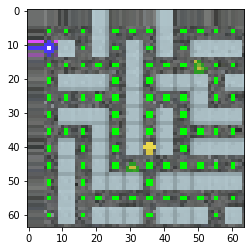

In [92]:
import random
import numpy as np
import tensorflow as tf

def apply_da(x):
    pad = 4
    h, w, c = x.shape
    paddings = [[pad, pad], [pad, pad], [0, 0]]
    x = np.pad(x, paddings, mode='edge')
    sh = np.random.randint(0, 2*pad)
    sw = np.random.randint(0, 2*pad)
    x = x[sh:sh+h, sw:sw+w, :]
    return x

import matplotlib.pyplot as plt
x = apply_da(obs)
plt.imshow(x)

In [116]:
epsilons = np.linspace(0.01, .4, m * B)
epsilon = epsilons[n*B:(n+1)*B]
epsilons

array([0.01      , 0.02695652, 0.04391304, 0.06086957, 0.07782609,
       0.09478261, 0.11173913, 0.12869565, 0.14565217, 0.1626087 ,
       0.17956522, 0.19652174, 0.21347826, 0.23043478, 0.2473913 ,
       0.26434783, 0.28130435, 0.29826087, 0.31521739, 0.33217391,
       0.34913043, 0.36608696, 0.38304348, 0.4       ])

In [47]:
class RunningMeanStd:
    def __init__(self, shape=(), scale=1., clip=10., epsilon=1e-2):
        self._sum = tf.Variable(np.zeros(shape), trainable=False, dtype=tf.float32, name='sum')
        self._sumsq = tf.Variable(np.zeros(shape), trainable=False, dtype=tf.float32, name='sum_squares')
        self._count = tf.Variable(np.zeros(shape), trainable=False, dtype=tf.float32, name='count')
        self._scale = scale
        self._clip = clip
        self._epsilon = epsilon


    def update(self, x):
        self._sum.assign_add(tf.reduce_sum(x, axis=0))
        self._sumsq.assign_add(tf.reduce_sum(x**2, axis=0))
        self._count.assign_add(tf.cast(tf.shape(x)[0], self._count.dtype))

    def normalize(self, x, subtract_mean=True):
        mean = self._sum / self._count
        std = tf.sqrt(tf.maximum(self._sumsq / self._count - mean**2, self._epsilon))
        print(mean, std)
        if subtract_mean:
            x = x - mean
        x = x / std
        x = tf.clip_by_value(self._scale * x, -self._clip, self._clip)
        return x

x1 = tf.random.normal((50,))
x2 = tf.random.normal((50,))
rms = RunningMeanStd(clip=100)
rms.update(x1)
rms.update(x2)
rms.normalize(x2)

tf.Tensor(-0.108698756, shape=(), dtype=float32) tf.Tensor(0.9891395, shape=(), dtype=float32)


<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.28186697,  0.8483434 ,  0.08353338,  0.81607485, -0.94028175,
       -0.51400024, -0.40140545,  1.6839927 , -1.5812025 , -0.6928396 ,
        0.31172827,  1.9175485 , -0.54670495,  1.5821981 ,  0.48406303,
        0.712562  , -0.16271879, -0.00921027, -0.17081334, -0.34536922,
       -0.7756538 ,  1.0517248 , -0.8912965 , -0.12052303, -1.3263113 ,
       -2.0328372 , -0.03018278, -0.50669664,  0.40516868, -0.57453114,
        0.5344831 , -2.2583141 ,  0.7508173 , -0.4116248 ,  0.9041305 ,
       -0.6592518 ,  1.0733013 , -0.06597132, -1.3990381 , -1.9398024 ,
       -0.4169602 ,  0.3204978 , -1.6257585 ,  2.4037998 , -1.2556072 ,
       -1.5783515 ,  0.61870295,  0.07896592,  0.14175874, -0.89640796],
      dtype=float32)>

In [49]:
np.nan or 1

nan

In [48]:
x = tf.concat([x1, x2], axis=0)
mean = tf.reduce_mean(x)
std = tf.math.reduce_std(x)
print(mean, std)
(x2 - mean) / std

tf.Tensor(-0.108698756, shape=(), dtype=float32) tf.Tensor(0.98913956, shape=(), dtype=float32)


<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.28186697,  0.8483433 ,  0.08353338,  0.8160748 , -0.9402817 ,
       -0.51400024, -0.40140545,  1.6839926 , -1.5812024 , -0.69283956,
        0.31172827,  1.9175484 , -0.5467049 ,  1.5821981 ,  0.484063  ,
        0.71256196, -0.16271879, -0.00921027, -0.17081332, -0.3453692 ,
       -0.7756537 ,  1.0517247 , -0.89129645, -0.12052302, -1.3263112 ,
       -2.0328372 , -0.03018278, -0.5066966 ,  0.40516865, -0.5745311 ,
        0.534483  , -2.2583141 ,  0.75081724, -0.4116248 ,  0.90413046,
       -0.65925175,  1.0733012 , -0.06597131, -1.399038  , -1.9398023 ,
       -0.41696018,  0.3204978 , -1.6257584 ,  2.4037998 , -1.2556072 ,
       -1.5783514 ,  0.61870295,  0.07896592,  0.14175873, -0.8964079 ],
      dtype=float32)>

In [47]:
import tensorflow as tf
from tensorflow.keras.applications import imagenet_utils
def correct_pad(inputs, kernel_size):
    """Returns a tuple for zero-padding for 2D convolution with downsampling.

    Arguments:
    inputs: Input tensor.
    kernel_size: An integer or tuple/list of 2 integers.

    Returns:
    A tuple.
    """
    input_size = x.shape[1:-1]
    if isinstance(kernel_size, int):
        kernel_size = (kernel_size, kernel_size)
    adjust = (1 - input_size[0] % 2, 1 - input_size[1] % 2)
    correct = (kernel_size[0] // 2, kernel_size[1] // 2)
    return ((correct[0] - adjust[0], correct[0]),
          (correct[1] - adjust[1], correct[1]))

x = tf.random.normal((2, 64, 64, 3))
f = tf.ones((3, 3, 3, 1))
y = tf.nn.conv2d(x, f, strides=2, padding='SAME')
print(y.shape)

(2, 32, 32, 1)


In [71]:
import tensorflow as tf
import time
x = tf.random.normal((64, 64, 64, 3))
conv = tf.keras.layers.Conv2D(16, 3, strides=1, padding='same')
dw = tf.keras.layers.DepthwiseConv2D(3, padding='same')
start = time.time()
conv(x)
print('conv2d:', time.time() - start)    # approximate 0.0036s
start = time.time()
dw(x)
print('dw:', time.time() - start)    # approximate 0.0034s
%timeit conv(x)    # 1000 loops, best of 3: 225 µs per loop
%timeit dw(x)    # 1000 loops, best of 3: 352 µs per loop

conv2d: 0.07517433166503906
dw: 0.03070998191833496
12.5 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.2 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [312]:
len({'a': 2})

1

In [7]:
import matplotlib
%matplotlib inline
matplotlib.use('TkAgg')

In [9]:
x = np.arange(10)
y1 = np.arange(10)
y2 = np.arange(10)**.9

sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette('Set2') # or husl
x = np.concatenate([x, x], axis=0)
y = np.concatenate([y1, y2], axis=0)
tag = ['y1' for _ in y1] + ['y2' for _ in y2]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
df = {'x': x, 'y': y, 'tag': tag}
df = pd.DataFrame.from_dict(df)
sns.lineplot(x=x, y=y, ax=ax, hue=tag)
ax.grid(True, alpha=0.8, linestyle=':')
ax.legend(loc='best').set_draggable(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.show()

In [147]:
from env.func import create_env
env = create_env({'name':'procgen_fruitbot'})

In [153]:
from utility.schedule import TFPiecewiseSchedule
lr = TFPiecewiseSchedule([(10, 1), (100, 0)])
step = tf.convert_to_tensor(20)
lr(step)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8888889>

In [165]:
lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([10, 100], [1, .5, 0])
step = tf.convert_to_tensor(20)
lr(step)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

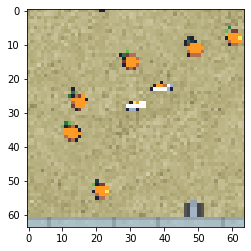

In [148]:
import matplotlib.pyplot as plt
obs = env.reset().obs
plt.imshow(obs)

In [60]:
import tensorflow as tf
u = 5
x0 = tf.reshape(tf.range(2*u,dtype=tf.float32), (2, u))
x1 = tf.reshape(tf.range(2*u,dtype=tf.float32), (2, u))
x0 = tf.random.shuffle(x0*.3)
x1 = tf.random.shuffle(x1*.3)
l = tf.keras.layers.Dense(u, kernel_initializer=tf.keras.initializers.constant(.3), use_bias=False)
l1 = tf.keras.layers.Dense(u, kernel_initializer=tf.keras.initializers.constant(.3), use_bias=False)
l2 = tf.keras.layers.Dense(u, kernel_initializer=tf.keras.initializers.constant(.3), use_bias=False)

In [64]:
x = tf.random.normal((64, 32, 32, 32))

In [75]:
%%timeit
y = tf.reduce_mean(x, [1, 2])
tf.reshape(y, ([y.shape[0], 1, 1, y.shape[-1]]))

871 µs ± 54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import ray
if not ray.is_initialized():
    ray.init()

class CNN(tf.Module):
    def __init__(self):
        self._layers = [
            layers.Conv2D(16, 3, 2, padding='same'),
            layers.Conv2D(32, 3, 2, padding='same'),
            layers.Conv2D(32, 3, 2, padding='same'),
            layers.Flatten(),
            layers.Dense(512),
            layers.Dense(1)
        ]
    def __call__(self, x):
        for l in self._layers:
            x = l(x)
        return x

    def get_weights(self):
        return [v.numpy() for v in self.variables]

    def set_weights(self, weights):
        [v.assign(w) for v, w in zip(self.variables, weights)]

class Model:
    def __init__(self):
        self.net = CNN()
        x = tf.random.normal((1, 64, 64, 3))
        self.net(x)
    
    def get_weights(self):
        return self.net.get_weights()
    
    def set_weights(self, t):
        w = t.get_weights()
        self.net.set_weights(w)


m = Model()       # regard this as the local learner
RemoteModel = ray.remote(Model)
rm = RemoteModel.remote()   # regard this as a remote worker
ray.get(rm.set_weights.remote(m))
ws1 = m.get_weights()
ws2 = ray.get(rm.get_weights.remote())
for w1, w2 in zip(ws1, ws2):
    np.testing.assert_allclose(w1, w2)

2020-10-06 09:26:27,293	INFO resource_spec.py:204 -- Starting Ray with 3.86 GiB memory available for workers and up to 1.94 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-06 09:26:27,526	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-10-06 09:26:27,814	INFO services.py:1163 -- View the Ray dashboard at localhost:8265


(pid=70048) 2020-10-06 09:26:32.248018: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=70048) 2020-10-06 09:26:32.269030: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f93453155b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
(pid=70048) 2020-10-06 09:26:32.269424: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
(pid=70048) 2020-10-06 09:26:32.341461: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [27]:
import tensorflow as tf
from tensorflow.keras import layers
import ray
if not ray.is_initialized():
    ray.init()

class CNN(tf.Module):
    def __init__(self):
        self._layers = [
            layers.Conv2D(16, 3, 2, padding='same'),
            layers.Conv2D(32, 3, 2, padding='same'),
            layers.Conv2D(32, 3, 2, padding='same'),
            layers.Flatten(),
            layers.Dense(512),
            layers.Dense(1)
        ]
    def __call__(self, x):
        for l in self._layers:
            x = l(x)
        return x

    def get_weights(self):
        return [v.numpy() for v in self.variables]

    def set_weights(self, weights):
        [v.assign(w) for v, w in zip(self.variables, weights)]

class Model:
    def __init__(self):
        self.net = CNN()
        x = tf.random.normal((1, 64, 64, 3))
        self.net(x)
    
    def get_weights(self):
        return self.net.get_weights()
    
    def set_weights(self, t):
        w = t.get_weights()
        self.net.set_weights(w)


m = Model()       # regard this as the local learner
RemoteModel = ray.remote(Model)
rm = RemoteModel.remote()   # regard this as a remote worker
ray.get(rm.set_weights.remote(m))
ws1 = m.get_weights()
ws2 = ray.get(rm.get_weights.remote())
for w1, w2 in zip(ws1, ws2):
    np.testing.assert_allclose(w1, w2)

(pid=69447) 2020-10-06 09:21:10.717521: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=69447) 2020-10-06 09:21:10.733471: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff28e98a0e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
(pid=69447) 2020-10-06 09:21:10.733537: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
(pid=69447) 2020-10-06 09:21:10.789411: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [28]:
# %%timeit
xs0 = tf.reduce_sum(x0, -1)
xs1 = tf.reduce_sum(x1, -1)
print(xs0[:5], xs1[:5], xs0[:5]+xs1[:5], sep='\n')
y0 = l1(x0)
y1 = l2(x1)
print((y0 + y1)[:5, 0])
# print(l1.variables)
# print(l2.variables)

NameError: name 'x0' is not defined

In [63]:
np.log2(32)

5.0

In [247]:
tf.random.set_seed(0)
shape = (5, 2*2, 2, 3)
a = tf.random.normal(shape)
b = tf.random.normal(shape)
v = tf.random.normal(shape)

In [252]:
# %%timeit
c = tf.transpose(a, [0, 2, 1, 3])
d = tf.transpose(b, [0, 2, 1, 3])
w = tf.transpose(v, [0, 2, 1, 3])
e = tf.matmul(c, d, transpose_b=True)
print(e[0, :, 0])
e = tf.nn.softmax(e)
print(e[0, :, 0])
e = tf.matmul(e, w)
e = tf.transpose(e, [0, 2, 1, 3])
e[0, 0]

tf.Tensor(
[[ 1.9171882  -2.6141732  -3.0143652   3.073635  ]
 [-0.30795598  1.2741388  -0.6916716   1.7253525 ]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[0.2382881  0.00256541 0.00171932 0.75742716]
 [0.07049312 0.3429587  0.04802874 0.5385195 ]], shape=(2, 4), dtype=float32)


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.40805963,  0.03214235,  0.15788347],
       [ 0.2589882 , -0.9299773 , -0.66830754]], dtype=float32)>

In [279]:
x = tf.random.normal((2, 3))
l = layers.Dense(2)
with tf.GradientTape() as tape:
    y = l(x)
    loss = tf.reduce_mean((y-1)**2)
g = tape.gradient(loss, l.variables)
opt = tf.keras.optimizers.Adam(1e-3)
opt.apply_gradients(zip(g, l.variables))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [281]:
env = create_env()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [212]:
%%timeit
l1(x)
l2(x)
l3(x)

7.16 ms ± 896 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
import tensorflow as tf
from tensorflow.keras import layers

fs = 3
x_32 = tf.random.normal((64, 32, 32, 32))
x_64 = tf.random.normal((64, 32, 32, 64))
l32_32 = layers.Conv2D(32, fs, padding='same')
l32_64 = layers.Conv2D(64, fs, padding='same')
l64_64 = layers.Conv2D(64, fs, padding='same')
l64_32 = layers.Conv2D(32, fs, padding='same')

In [59]:
%%timeit
l32_32(x_32)

8 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%%timeit
l64_64(x_64)

23.1 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%%timeit
l32_64(x_32)

15.7 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
%%timeit
l64_32(x_64)

11.2 ms ± 249 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [90]:
MOVING_AVERAGE_DECAY = 0.9
EPSILON = 1e-5

LAYER_BN_RELU = 'bn_relu'
LAYER_EVONORM_B0 = 'evonorm_b0'
LAYER_EVONORM_S0 = 'evonorm_s0'
LAYER_EVONORMS = [
    LAYER_EVONORM_B0,
    LAYER_EVONORM_S0,
]
# tf = tf.compat.v1
def _instance_std(inputs,
                  epsilon=EPSILON,
                  data_format='channels_first'):
    """Instance standard deviation."""
    axes = [1, 2] if data_format == 'channels_last' else [2, 3]
    _, variance = tf.nn.moments(inputs, axes=axes, keepdims=True)
    return tf.sqrt(variance + epsilon)


def _batch_std(inputs,
               training,
               decay=MOVING_AVERAGE_DECAY,
               epsilon=EPSILON,
               data_format='channels_first',
               name='moving_variance'):
    """Batch standard deviation."""
    if data_format == 'channels_last':
        var_shape, axes = (1, 1, 1, inputs.shape[3]), [0, 1, 2]
    else:
        var_shape, axes = (1, inputs.shape[1], 1, 1), [0, 2, 3]
    moving_variance = tf.get_variable(
        name=name,
        shape=var_shape,
        initializer=tf.initializers.ones(),
        dtype=tf.float32,
        collections=[
          tf.GraphKeys.MOVING_AVERAGE_VARIABLES,
          tf.GraphKeys.GLOBAL_VARIABLES
        ],
        trainable=False)
    if training:
        _, variance = tf.nn.moments(inputs, axes, keep_dims=True)
        variance = tf.cast(variance, tf.float32)
        update_op = tf.assign_sub(
            moving_variance,
            (moving_variance - variance) * (1 - decay))
        tf.add_to_collection(tf.GraphKeys.UPDATE_OPS, update_op)
    else:
        variance = moving_variance
    std = tf.sqrt(variance + epsilon)
    return tf.cast(std, inputs.dtype)


def _group_std(inputs,
               epsilon=EPSILON,
               data_format='channels_first',
               num_groups=32):
    """Grouped standard deviation along the channel dimension."""
    axis = 3 if data_format == 'channels_last' else 1
    while num_groups > 1:
        if inputs.shape[axis] % num_groups == 0:
            break
        num_groups -= 1
    if data_format == 'channels_last':
        _, h, w, c = inputs.shape.as_list()
        x = tf.reshape(inputs, [-1, h, w, num_groups, c // num_groups])
        _, variance = tf.nn.moments(x, [1, 2, 4], keep_dims=True)
    else:
        _, c, h, w = inputs.shape.as_list()
        x = tf.reshape(inputs, [-1, num_groups, c // num_groups, h, w])
        _, variance = tf.nn.moments(x, [2, 3, 4], keep_dims=True)
    std = tf.sqrt(variance + epsilon)
    std = tf.broadcast_to(std, x.shape.as_list())
    return tf.reshape(std, inputs.shape.as_list())


def evonorm(inputs,
            is_training,
            layer=LAYER_EVONORM_B0,
            nonlinearity=True,
            init_zero=False,
            decay=MOVING_AVERAGE_DECAY,
            epsilon=EPSILON,
            num_groups=32,
            data_format='channels_last'):
    """Apply an EvoNorm transformation (an alternative to BN-ReLU).

     Hanxiao Liu, Andrew Brock, Karen Simonyan, Quoc V. Le.
     Evolving Normalization-Activation Layers.
     https://arxiv.org/abs/2004.02967

    Args:
    inputs: `Tensor` whose shape is either `[batch, channels, ...]` with
        the "channels_first" format or `[batch, height, width, channels]`
        with the "channels_last" format.
    is_training: `bool` for whether the model is training.
    layer: `String` specifies the EvoNorm instantiation.
    nonlinearity: `bool` if False, apply an affine transform only.
    init_zero: `bool` if True, initializes scale parameter of batch
        normalization with 0 instead of 1 (default).
    decay: `float` a scalar decay used in the moving average.
    epsilon: `float` a small float added to variance to avoid dividing by zero.
    num_groups: `int` the number of groups per layer, used only when `layer` ==
        LAYER_EVONORM_S0.
    data_format: `str` either "channels_first" for `[batch, channels, height,
        width]` or "channels_last for `[batch, height, width, channels]`.

    Returns:
    A normalized `Tensor` with the same `data_format`.
    """
    if init_zero:
        gamma_initializer = tf.zeros_initializer()
    else:
        gamma_initializer = tf.ones_initializer()

    if data_format == 'channels_last':
        var_shape = (1, 1, 1, inputs.shape[3])
    else:
        var_shape = (1, inputs.shape[1], 1, 1)
    with tf.variable_scope(None, default_name='evonorm'):
        beta = tf.get_variable(
            'beta',
            shape=var_shape,
            dtype=inputs.dtype,
            initializer=tf.zeros_initializer())
        gamma = tf.get_variable(
            'gamma',
            shape=var_shape,
            dtype=inputs.dtype,
            initializer=gamma_initializer)
        if nonlinearity:
            v = tf.get_variable(
              'v',
              shape=var_shape,
              dtype=inputs.dtype,
              initializer=tf.ones_initializer())
            if layer == LAYER_EVONORM_S0:
                den = _group_std(
                inputs,
                epsilon=epsilon,
                data_format=data_format,
                num_groups=num_groups)
                inputs = inputs * tf.nn.sigmoid(v * inputs) / den
            elif layer == LAYER_EVONORM_B0:
                left = _batch_std(
                    inputs,
                    decay=decay,
                    epsilon=epsilon,
                    data_format=data_format,
                    training=is_training)
                right = v * inputs + _instance_std(
                    inputs, epsilon=epsilon, data_format=data_format)
                inputs = inputs / tf.maximum(left, right)
            else:
                raise ValueError('Unknown EvoNorm layer: {}'.format(layer))
        return inputs * gamma + beta
tf.random.set_random_seed(0)
x = tf.random.normal((2, 4, 4, 32))
evonorm(x, False, LAYER_EVONORM_S0, num_groups=4)

<tf.Tensor: shape=(2, 4, 4, 32), dtype=float32, numpy=
array([[[[ 1.32528090e+00,  2.73560852e-01, -1.78197220e-01, ...,
           1.18587241e-02,  1.28796554e+00, -2.04672262e-01],
         [ 7.11216033e-01,  1.05891228e+00, -2.66307265e-01, ...,
           1.40329286e-01,  1.12847112e-01, -2.42907763e-01],
         [-2.84346014e-01, -6.01930767e-02,  1.74544886e-01, ...,
          -7.81291351e-02, -1.13903977e-01, -1.40023716e-02],
         [ 6.47567034e-01, -2.16924876e-01,  1.59592792e-01, ...,
           8.57557714e-01, -1.79159418e-01, -1.61195859e-01]],

        [[-2.55698144e-01, -1.06455423e-01, -7.17366068e-03, ...,
           3.86843294e-01, -2.21828789e-01, -7.41114095e-02],
         [ 9.68240380e-01,  1.30160224e+00, -2.98003584e-01, ...,
           8.61036658e-01, -1.02161631e-01, -1.20031193e-01],
         [-2.97979116e-01,  3.18839729e-01,  4.93105054e-01, ...,
           5.36277771e-01,  3.34502548e-01, -2.38954067e-01],
         [ 1.38202578e-01,  7.85326362e-02,  1.

In [92]:
b = {'a': 1}.get('b')
print(b)

None


In [239]:
l.set_weights(l2.get_weights())
opt = tf.keras.optimizers.Adam(2e-3)
with tf.GradientTape() as tape:
    y = l(x)
    loss = .5 * tf.reduce_mean((y - 1)**2)
vs = l.trainable_variables
gs = tape.gradient(loss, vs)
opt.apply_gradients(zip(gs, vs))
w2 = l.get_weights()

In [242]:
scores = {
    'coinrun': [5, 10],
    'starpilot': [2.5, 64],
    'caveflyer': [3.5, 12],
    'dodgeball': [1.5, 19],
    'fruitbot': [-1.5, 32.4],
    'chaser': [.5, 13],
    'miner': [1.5, 13],
    'jumper': [1, 10],
    'leaper': [1.5, 10],
    'maze': [5, 10],
    'bigfish': [1, 40],
    'heist': [3.5, 10],
    'climber': [2, 12.6],
    'plunder': [4.5, 30],
    'ninja': [3.5, 10],
    'bossfight': [.5, 13],
    'c1': [5, 24]
}

coinrun_score = 8.8
bigfish_score = 22
miner_score = 10
normalized_scores = []
for name in ['coinrun', 'bigfish', 'miner']:
    

'dfwef'

In [234]:
a = tf.constant([2, 1, 0])[..., None]
c = tf.range(2)[None]
i = a * 2 + c
print(i)
x = tf.ones((3, 4, 4, 8))
v = tf.range(8, dtype=tf.float32)
v = tf.reshape(v, (1, 1, 1, 8))
x = x * v
# print(x)
y = tf.gather(x, i, axis=-1,batch_dims=1)
print(y.shape)
print(y)

tf.Tensor(
[[4 5]
 [2 3]
 [0 1]], shape=(3, 2), dtype=int32)
(3, 4, 4, 2)
tf.Tensor(
[[[[4. 5.]
   [4. 5.]
   [4. 5.]
   [4. 5.]]

  [[4. 5.]
   [4. 5.]
   [4. 5.]
   [4. 5.]]

  [[4. 5.]
   [4. 5.]
   [4. 5.]
   [4. 5.]]

  [[4. 5.]
   [4. 5.]
   [4. 5.]
   [4. 5.]]]


 [[[2. 3.]
   [2. 3.]
   [2. 3.]
   [2. 3.]]

  [[2. 3.]
   [2. 3.]
   [2. 3.]
   [2. 3.]]

  [[2. 3.]
   [2. 3.]
   [2. 3.]
   [2. 3.]]

  [[2. 3.]
   [2. 3.]
   [2. 3.]
   [2. 3.]]]


 [[[0. 1.]
   [0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]
   [0. 1.]]]], shape=(3, 4, 4, 2), dtype=float32)


In [409]:
x = tf.random.uniform((2, 3, 3, 3), 0, 1)
l = tf.keras.layers.Conv2D(3, 3, trainable=False)
l(x)
ki = tf.keras.initializers.get('glorot_uniform')
ki

In [414]:
# %%timeit
print(l.variables[0][0, 0].numpy())
w = l.variables[0]
w.assign(ki(w.shape))
print(l.variables[0][0, 0].numpy())

[[-0.19756787 -0.06822005  0.31459454]
 [ 0.09108767 -0.05315256 -0.23182988]
 [ 0.31561747  0.13336363  0.2311497 ]]
[[ 0.20526233  0.281184   -0.32184705]
 [-0.26354975 -0.24081159  0.06373253]
 [-0.16821647  0.3108113   0.01806116]]


In [408]:
%%timeit
l(x)

225 µs ± 4.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [311]:
a = tf.random.uniform((2,), 0, 15, dtype=tf.int32)
idx = tf.stack([tf.range(a.shape[0]), a], -1)
q = tf.random.normal((2, 15))
print(idx)
print(q)
tf.gather_nd(q, idx)

tf.Tensor(
[[0 9]
 [1 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-0.8469832  -0.21888533 -0.30787975 -0.18129683  0.3369443  -0.8984027
  -0.7467201   0.01811226  0.63877887  0.15181074  0.07506377  1.3474562
   0.10659567 -1.173811    0.5844975 ]
 [-0.7929566   1.1438088   1.5290663   0.6928618   1.2734599  -0.69927055
  -0.48324805 -1.1484063  -1.5618385  -2.1519914   0.12078126 -0.37238482
  -0.2242153  -0.6183415   0.02820674]], shape=(2, 15), dtype=float32)


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.15181074, 1.2734599 ], dtype=float32)>

0.0 28060


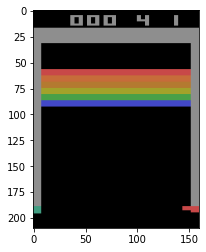

In [595]:
for i in range(1000):
    o, r, d, d2 = env.step(0)
    if env.game_over():
        print(i, 'here', env.game_over())
        env.reset()
img = env.get_screen()
print(env.score(), env.epslen())
plt.imshow(img)

In [70]:
class Env:
    def __init__(self, n):
        self.n = n
        self.reset()

    def reset(self):
        self.idx = 0
        self.s2r = [.1 if i % 2 == 0 else np.random.normal() for i in range(self.n)]
        return self.idx
    
    def step(self):
        if self.idx == len(self.s2r):
            self.reset()
        r = self.s2r[self.idx]
        self.idx += 1
        return self.idx-1, r
    
    def done(self):
        return self.idx == len(self.s2r)
    
class EnvVec:
    def __init__(self, n, n_envs):
        self.envs = [Env(n) for _ in range(n_envs)]
        
    def reset(self):
        return [e.reset() for e in self.envs]
    
    def step(self):
        return list(zip(*[e.step() for e in self.envs]))
    
    def done(self):
        return np.all([e.done() for e in self.envs])
n = 10
env = EnvVec(n, 10)
s = env.reset()
for i in range(1, 15):
    if env.done():
        print('reset')
        
    s, r = env.step()
    
    print(i)

1
2
3
4
5
6
7
8
9
10
reset
11
12
13
14


In [82]:
import tensorflow as tf
from tensorflow.keras import layers
gamma_p = 1
lambda_p = 1

gamma_l = layers.Dense(1)
lambda_l = layers.Dense(1)
value_l = layers.Dense(1)

def compute_gamma(s):
    return tf.squeeze(gamma_l(s))

def compute_lambda(s):
    return tf.squeeze(lambda_l(s))

def compute_value(s):
    return tf.squeeze(value_l(s), 0)

def lambda_return(reward, value, discount, lambda_, bootstrap=None, axis=0):
    """
    discount includes the done signal if there is any.
    axis specifies the time dimension
    """
    if isinstance(discount, (int, float)):
        discount = discount * tf.ones_like(reward)
    if isinstance(lambda_, (int, float)):
        lambda_ = lambda_ * tf.ones_like(reward)
    tf.debugging.assert_shapes([
        [reward, (None, 10)],
        [value, (None, 10)],
        [discount, (None, 10)],
        [lambda_, (None, 10)],
    ])
    # swap 'axis' with the 0-th dimension
    dims = list(range(reward.shape.ndims))
    dims = [axis] + dims[1:axis] + [0] + dims[axis + 1:]
    if axis != 0:
        reward = tf.transpose(reward, dims)
        value = tf.transpose(value, dims)
        discount = tf.transpose(discount, dims)
    if bootstrap is None:
        bootstrap = tf.zeros_like(value[-1])
    next_values = tf.concat([value[1:], bootstrap[None]], 0)
    # 1-step target: r + 𝛾 * v' * (1 - 𝝀)
    inputs = reward + discount * next_values * (1 - lambda_)
    # lambda function computes lambda return starting from the end
    returns = static_scan(
        lambda acc, cur: cur[0] + cur[1] * cur[2] * acc,
        bootstrap, (inputs, discount, lambda_), reverse=True
    )
    if axis != 0:
         returns = tf.transpose(returns, dims)
    return returns

lr = 1e-3
v_opt = tf.keras.optimizers.Adam(lr)
g_opt = tf.keras.optimizers.Adam(lr, beta_1=0)

n = 10
n_envs = 10
n_eps = 10000
env = EnvVec(n, n_envs)
        
@tf.function
def update(s, r, s2, r2):
    s = tf.one_hot(s, n)
    with tf.GradientTape() as t2:
        with tf.GradientTape() as t:
            gam = compute_gamma(s)
            v = compute_value(s)
            target = lambda_return(r, v, gam, lambda_p, axis=1)
            loss = .5 * (target - v)**2
        grads = t.gradient(loss, value_l.variables)
        norm = v_opt.apply_gradients(zip(grads, value_l.variables))
        
        v2 = compute_value(s2)
        target2 = lambda_return(r2, v2, gamma_p, lambda_p, axis=1)
        loss2 = .5 * (target2 - v2)**2
    grads2 = t2.gradient(loss2, gamma_l.variables)
    norm2 = g_opt.apply_gradients(zip(grads2, gamma_l.variables))
        
    
for _ in range(int(n_eps)):
    env.reset()
    s1, r1 = [], []
    s2, r2 = [], []
    while not env.done():
        s, r = env.step()
        s1.append(s)
        r1.append(r)
        print(1, r1)
    env.reset()
    while not env.done():
        s, r = env.step()
        s2.append(s)
        r2.append(r)
        print(2, r2)
    r1 = np.array(r1)
    r2 = np.array(r2)
    s1 = np.array(s1)
    s2 = np.array(s2)


1 [(0.1, 0.1)]
1 [(0.1, 0.1), (-1.6590103642265044, -0.1350388852006844)]
2 [(0.1, 0.1)]
2 [(0.1, 0.1), (-1.2110441685376914, 1.068158538470314)]


In [71]:
def static_scan(fn, start, inputs, reverse=False):
    """ Sequentially apply fn to inputs, with starting state start.
    inputs are expected to be time-major, and the outputs of fn are expected
    to have the same structure as start. 
    This function is equivalent to 
    tf.scan(
        fn=fn
        elems=inputs, 
        initializer=start,
        parallel_iterations=1,
        reverse=reverse
    )
    In practice, we find it's faster than tf.scan
    """
    last = start
    outputs = [[] for _ in tf.nest.flatten(start)]
    indices = range(len(tf.nest.flatten(inputs)[0]))
    if reverse:
        indices = reversed(indices)
    for index in indices:
        # extract inputs at step index
        inp = tf.nest.map_structure(lambda x: x[index], inputs)
        last = fn(last, inp)
        # distribute outputs
        [o.append(l) for o, l in zip(outputs, tf.nest.flatten(last))]
    if reverse:
        outputs = [list(reversed(x)) for x in outputs]
    outputs = [tf.stack(x) for x in outputs]
    # reconstruct outputs to have the same structure as start
    return tf.nest.pack_sequence_as(start, outputs)


(-inf, inf)
int64
666 True {'prev_level_seed': 1753219764, 'prev_level_complete': 0, 'level_seed': 1388491082}


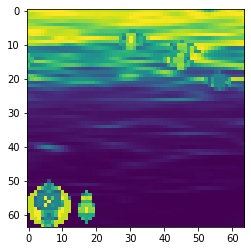

In [283]:
from env.procgen import Procgen
import matplotlib.pyplot as plt
env = Procgen(dict(
    name='plunder',
    distribution_mode='easy'
))
print(env.reward_range)
print(env.action_space.dtype)
o = env.reset()
for i in range(10000):
    o, r, d, ii = env.step(0)
    if d:
        print(i, d, ii)
        break
plt.imshow(o[..., 0])

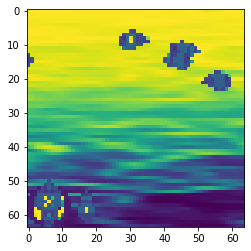

In [286]:
plt.imshow(o[..., 2])

In [90]:
from skimage.util.shape import view_as_windows
imgs = np.random.normal(size=(6, 5, 5, 2))
output_size = 4
n = imgs.shape[0]
img_size = imgs.shape[1]
crop_max = img_size - output_size
w1 = np.random.randint(0, crop_max, n)
h1 = np.random.randint(0, crop_max, n)
# creates all sliding windows combinations of size (output_size)
windows = view_as_windows(
    imgs, (1, output_size, output_size, 1))[..., 0,:,:, 0]
# selects a random window for each batch element
print(windows.shape)
cropped_imgs = windows[np.arange(n), w1, h1]
cropped_imgs.shape

(6, 2, 2, 2, 4, 4)


(6, 2, 4, 4)

In [93]:
import atari_py as atari
gym.make('QbertNoFrameskip-v4')

<TimeLimit<AtariEnv<QbertNoFrameskip-v4>>>

In [102]:
import tensorflow_probability as tfp
tfd = tfp.distributions

probs = tf.nn.softmax(tf.zeros((2, 3)))
d = tfd.Categorical(probs=probs)
print(d.probs)

tf.Tensor(
[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]], shape=(2, 3), dtype=float32)


In [76]:
%%timeit
o = env.step(env.action_space.sample())[0]
cv2.cvtColor(o, cv2.COLOR_RGB2GRAY)

79.4 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [75]:
%%timeit
env.step(env.action_space.sample())
env.ale.getScreenGrayscale(buffer)

88.6 µs ± 2.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [46]:
from typing import overload, Tuple
@overload
def process(response: None) -> None:
    ...
@overload
def process(response: int) -> Tuple[int, str]:
    ...
@overload
def process(response: bytes) -> str:
    ...
def process(response):
    print(response)
process('ab')

ab
